# GEOG310, Lab 03, Importing Automatic Weather Station Data from Netcdf file structure

This notebook allows you to get familiar with importing data from netcdf files. We will be using the Xarray library to do that and practince some plotting to viuslaize the time series data

**What is the Xarray python library?**
From https://docs.xarray.dev/en/stable/index.html <br>
"Xarray makes working with labelled multi-dimensional arrays in Python simple, efficient, and fun!" <br> "Real-world datasets are usually more than just raw numbers; they have labels which encode information about how the array values map to locations in space, time, etc."

**Reading a netcdf file**

Netcdf (Network Common Data Form) file (*.nc) is a format that is widely used across scientific deciplines. It supports "the creation, access, and sharing of array-oriented scientific data" (https://www.unidata.ucar.edu/software/netcdf/).

**Matplotlib cheat sheet for plotting** <br>
https://matplotlib.org/cheatsheets/

# Section 1. Reading Automatic Weather Station data (in netcdf file)


### Section 1.1. Importing Libraries and nectdf file dataset

In [1]:
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt

First, we need to use xarray to open/read the netcdf file. Using **open_dataset** function. 

**TIP:** Another important function is **open_mfdataset** which can open multiple files and merge them automatically to a single dataset to use (more on that in upcoming labs)

Get the netcdf file from Learn and downlaod it inot yoru working directory on see-trx4001 machine. The file name is called "FENZ_BLF_AWS_all.nc"

In [2]:
ds = xr.open_dataset("./FENZ_BLF_AWS_all.nc")

The imported **dataset (ds)** has **data arrays** in it and are the fundamental data structures. Each **data array object** has dimensions associated with it sometimes more infromation known as **attributes**.

In [3]:
ds # Exploring the dataset

<xarray.Dataset>
Dimensions:            (geometry: 1, height: 1, time: 235262)
Coordinates:
  * geometry           (geometry) object '0101000000AB9509BFD495654040FB91223...
  * height             (height) float32 2.0
  * time               (time) datetime64[ns] 1996-07-12T12:00:00 ... 2023-08-...
Data variables:
    externalId         (geometry) object ...
    lat                (geometry) float64 ...
    lon                (geometry) float64 ...
    name               (geometry) object ...
    ref                (geometry) object ...
    station_id         (geometry) object ...
    wind_speed         (geometry, height, time) float32 ...
    wind_direction     (time, geometry, height) float32 ...
    temperature        (geometry, height, time) float32 ...
    precipitation      (time, geometry, height) float32 ...
    relative_humidity  (time, geometry, height) float32 ...
Attributes:
    result_type:     time_series
    title:           mean wind_speed in m/s of the atmosphere by a sensor_rec...
    institution:     FENZ
    license:         https://creativecommons.org/licenses/by/4.0/
    source:          sensor_recording
    system_version:  4
    version_date:    2022-03-23T00:00:00

### Section 1.2 Calling and indexing the data arrays

In [4]:
ds.temperature # each variable in a dataset is called a dataarray. Here we called the temperature data array

<xarray.DataArray 'temperature' (geometry: 1, height: 1, time: 235262)>
[235262 values with dtype=float32]
Coordinates:
  * geometry  (geometry) object '0101000000AB9509BFD495654040FB912232BC45C0'
  * height    (height) float32 2.0
  * time      (time) datetime64[ns] 1996-07-12T12:00:00 ... 2023-08-09T18:00:00
Attributes:
    DIMENSION_LABELS:       ['geometry', 'height', 'time']
    feature:                atmosphere
    parameter:              temperature
    method:                 sensor_recording
    product_code:           raw_data
    owner:                  FENZ
    aggregation_statistic:  mean
    frequency_interval:     1H
    utc_offset:             0H
    dataset_id:             dddb02cd5cb7ae191311ab19
    license:                https://creativecommons.org/licenses/by/4.0/
    attribution:            Data licenced by FENZ
    result_type:            time_series
    precision:              0.1
    block_length:           0.0
    time_interval:          7300
    standard_name:          air_temperature
    dtype:                  int16
    dtype_decoded:          float32

In [5]:
ds["temperature"] # another way calling the data array from the dataset

<xarray.DataArray 'temperature' (geometry: 1, height: 1, time: 235262)>
[235262 values with dtype=float32]
Coordinates:
  * geometry  (geometry) object '0101000000AB9509BFD495654040FB912232BC45C0'
  * height    (height) float32 2.0
  * time      (time) datetime64[ns] 1996-07-12T12:00:00 ... 2023-08-09T18:00:00
Attributes:
    DIMENSION_LABELS:       ['geometry', 'height', 'time']
    feature:                atmosphere
    parameter:              temperature
    method:                 sensor_recording
    product_code:           raw_data
    owner:                  FENZ
    aggregation_statistic:  mean
    frequency_interval:     1H
    utc_offset:             0H
    dataset_id:             dddb02cd5cb7ae191311ab19
    license:                https://creativecommons.org/licenses/by/4.0/
    attribution:            Data licenced by FENZ
    result_type:            time_series
    precision:              0.1
    block_length:           0.0
    time_interval:          7300
    standard_name:          air_temperature
    dtype:                  int16
    dtype_decoded:          float32

Do you still remember how to find the size, shape and number of dimensions from last lab?
Find the size, shape and number of dimensions of the variable temperature within the data sate array ds

In [6]:
print(ds.temperature.shape)
print(ds.temperature.size)
print(ds.temperature.ndim)

(1, 1, 235262)
235262
3


Let's practice with calling some variables within the "temperature" data array using the conventional indexing method

In [7]:
ds.temperature[0,0,235261] # specific calling of variable indexed by the number 235261

<xarray.DataArray 'temperature' ()>
array(0.7, dtype=float32)
Coordinates:
    geometry  <U42 '0101000000AB9509BFD495654040FB912232BC45C0'
    height    float32 2.0
    time      datetime64[ns] 2023-08-09T18:00:00
Attributes:
    DIMENSION_LABELS:       ['geometry', 'height', 'time']
    feature:                atmosphere
    parameter:              temperature
    method:                 sensor_recording
    product_code:           raw_data
    owner:                  FENZ
    aggregation_statistic:  mean
    frequency_interval:     1H
    utc_offset:             0H
    dataset_id:             dddb02cd5cb7ae191311ab19
    license:                https://creativecommons.org/licenses/by/4.0/
    attribution:            Data licenced by FENZ
    result_type:            time_series
    precision:              0.1
    block_length:           0.0
    time_interval:          7300
    standard_name:          air_temperature
    dtype:                  int16
    dtype_decoded:          float32

In [8]:
ds.temperature[0,0,2] # calling the second element of the third dimension

<xarray.DataArray 'temperature' ()>
array(26.8, dtype=float32)
Coordinates:
    geometry  <U42 '0101000000AB9509BFD495654040FB912232BC45C0'
    height    float32 2.0
    time      datetime64[ns] 1996-07-12T14:00:00
Attributes:
    DIMENSION_LABELS:       ['geometry', 'height', 'time']
    feature:                atmosphere
    parameter:              temperature
    method:                 sensor_recording
    product_code:           raw_data
    owner:                  FENZ
    aggregation_statistic:  mean
    frequency_interval:     1H
    utc_offset:             0H
    dataset_id:             dddb02cd5cb7ae191311ab19
    license:                https://creativecommons.org/licenses/by/4.0/
    attribution:            Data licenced by FENZ
    result_type:            time_series
    precision:              0.1
    block_length:           0.0
    time_interval:          7300
    standard_name:          air_temperature
    dtype:                  int16
    dtype_decoded:          float32

Task:
    Call the last element in the temperature data array

In [9]:
# Method 1
ds.temperature[0,0,-1]

<xarray.DataArray 'temperature' ()>
array(0.7, dtype=float32)
Coordinates:
    geometry  <U42 '0101000000AB9509BFD495654040FB912232BC45C0'
    height    float32 2.0
    time      datetime64[ns] 2023-08-09T18:00:00
Attributes:
    DIMENSION_LABELS:       ['geometry', 'height', 'time']
    feature:                atmosphere
    parameter:              temperature
    method:                 sensor_recording
    product_code:           raw_data
    owner:                  FENZ
    aggregation_statistic:  mean
    frequency_interval:     1H
    utc_offset:             0H
    dataset_id:             dddb02cd5cb7ae191311ab19
    license:                https://creativecommons.org/licenses/by/4.0/
    attribution:            Data licenced by FENZ
    result_type:            time_series
    precision:              0.1
    block_length:           0.0
    time_interval:          7300
    standard_name:          air_temperature
    dtype:                  int16
    dtype_decoded:          float32

In [10]:
# Method 2
k=ds.temperature.size-1
ds.temperature[0,0,k]

<xarray.DataArray 'temperature' ()>
array(0.7, dtype=float32)
Coordinates:
    geometry  <U42 '0101000000AB9509BFD495654040FB912232BC45C0'
    height    float32 2.0
    time      datetime64[ns] 2023-08-09T18:00:00
Attributes:
    DIMENSION_LABELS:       ['geometry', 'height', 'time']
    feature:                atmosphere
    parameter:              temperature
    method:                 sensor_recording
    product_code:           raw_data
    owner:                  FENZ
    aggregation_statistic:  mean
    frequency_interval:     1H
    utc_offset:             0H
    dataset_id:             dddb02cd5cb7ae191311ab19
    license:                https://creativecommons.org/licenses/by/4.0/
    attribution:            Data licenced by FENZ
    result_type:            time_series
    precision:              0.1
    block_length:           0.0
    time_interval:          7300
    standard_name:          air_temperature
    dtype:                  int16
    dtype_decoded:          float32

What does this do?

In [11]:
ds.temperature[0,0,200:220]

<xarray.DataArray 'temperature' (time: 20)>
array([ 7.4     ,  8.400001,  7.4     ,  8.6     , 11.400001, 10.8     ,
       10.1     ,  9.2     ,  7.6     ,  6.6     ,  6.4     ,  5.6     ,
        4.7     ,  4.2     ,  3.7     ,  3.4     ,  3.      ,  2.8     ,
        3.2     ,  3.7     ], dtype=float32)
Coordinates:
    geometry  <U42 '0101000000AB9509BFD495654040FB912232BC45C0'
    height    float32 2.0
  * time      (time) datetime64[ns] 1996-07-20T20:00:00 ... 1996-07-21T15:00:00
Attributes:
    DIMENSION_LABELS:       ['geometry', 'height', 'time']
    feature:                atmosphere
    parameter:              temperature
    method:                 sensor_recording
    product_code:           raw_data
    owner:                  FENZ
    aggregation_statistic:  mean
    frequency_interval:     1H
    utc_offset:             0H
    dataset_id:             dddb02cd5cb7ae191311ab19
    license:                https://creativecommons.org/licenses/by/4.0/
    attribution:            Data licenced by FENZ
    result_type:            time_series
    precision:              0.1
    block_length:           0.0
    time_interval:          7300
    standard_name:          air_temperature
    dtype:                  int16
    dtype_decoded:          float32

Task: Ask ChatGPT or Google Bard "what does isel do in python"

Task: Can you rewrite with isel the command that does the same as "ds.temperature[0,0,200:220]"

You can also use values to get only the values of the dataarray, the return values will be in a numpy array that has the same dimesion of the original data

In [12]:
ds.temperature.isel(geometry=0,height=0,time=range(200,220)).values # this returns values but looses other information

array([ 7.4      ,  8.400001 ,  7.4      ,  8.6      , 11.400001 ,
       10.8      , 10.1      ,  9.2      ,  7.6      ,  6.6      ,
        6.4      ,  5.6      ,  4.7000003,  4.2000003,  3.7      ,
        3.4      ,  3.       ,  2.8      ,  3.2      ,  3.7      ],
      dtype=float32)

Task
Find the time period covering the range of values of temperature indexed between the range 200 and 220

### Section 1.3 Plotting

#### Plotting using the index select method "isel" and direct indexing

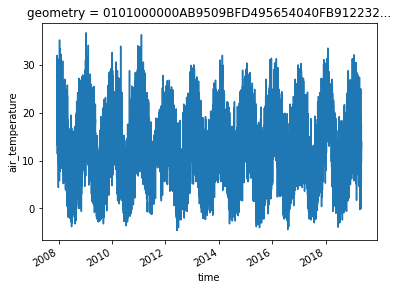

In [13]:
ds.temperature.isel(geometry=0,height=0,time=range(100000,200000)).plot()

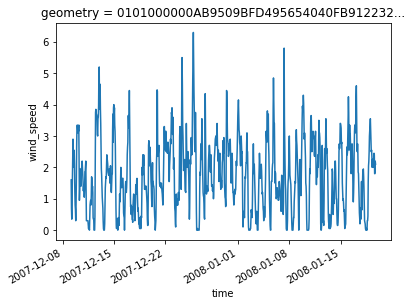

In [16]:
ds.wind_speed.isel(geometry=0,height=0,time=range(100000,101000)).plot()

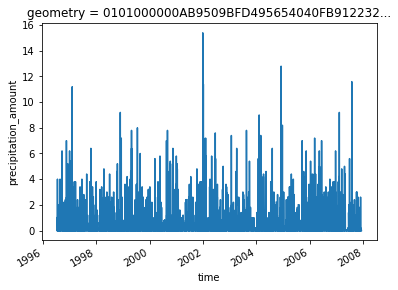

In [18]:
ds.precipitation.isel(geometry=0,height=0,time=range(0,100000)).plot()

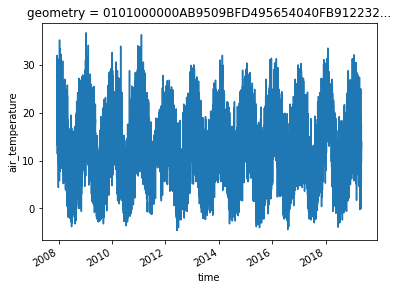

In [14]:
ds.temperature[0,0,100000:200000].plot()

#### Changing plot attributes

Text(0, 0.5, 'Air Temperature (Celsius)')

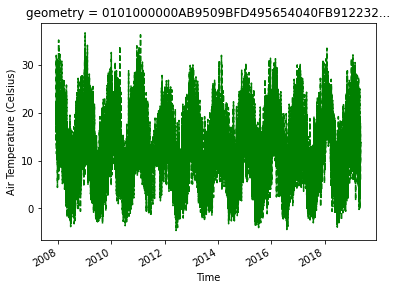

In [38]:
ds.temperature[0,0,100000:200000].plot(linestyle="dashed", color="green")
plt.xlabel("Time")
plt.ylabel("Air Temperature (Celsius)")

(0.0, 10.0)

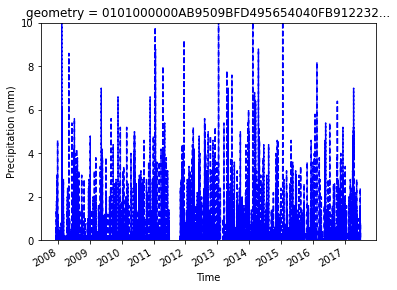

In [41]:
ds.precipitation[100000:200000,0,0].plot(linestyle="dashed", color="blue")
plt.xlabel("Time")
plt.ylabel("Precipitation (mm)")
plt.ylim(0,10)

In [40]:
ds

<xarray.Dataset>
Dimensions:            (geometry: 1, height: 1, time: 235262)
Coordinates:
  * geometry           (geometry) object '0101000000AB9509BFD495654040FB91223...
  * height             (height) float32 2.0
  * time               (time) datetime64[ns] 1996-07-12T12:00:00 ... 2023-08-...
Data variables:
    externalId         (geometry) object '43.47028S 172.68222E V1.0'
    lat                (geometry) float64 -43.47
    lon                (geometry) float64 172.7
    name               (geometry) object 'Bottle Lake'
    ref                (geometry) object 'bottle_lake'
    station_id         (geometry) object '47feb204580757d31df499e7'
    wind_speed         (geometry, height, time) float32 ...
    wind_direction     (time, geometry, height) float32 ...
    temperature        (geometry, height, time) float32 ...
    precipitation      (time, geometry, height) float32 ...
    relative_humidity  (time, geometry, height) float32 ...
Attributes:
    result_type:     time_series
    title:           mean wind_speed in m/s of the atmosphere by a sensor_rec...
    institution:     FENZ
    license:         https://creativecommons.org/licenses/by/4.0/
    source:          sensor_recording
    system_version:  4
    version_date:    2022-03-23T00:00:00

Text(0.5, 0, 'Time')

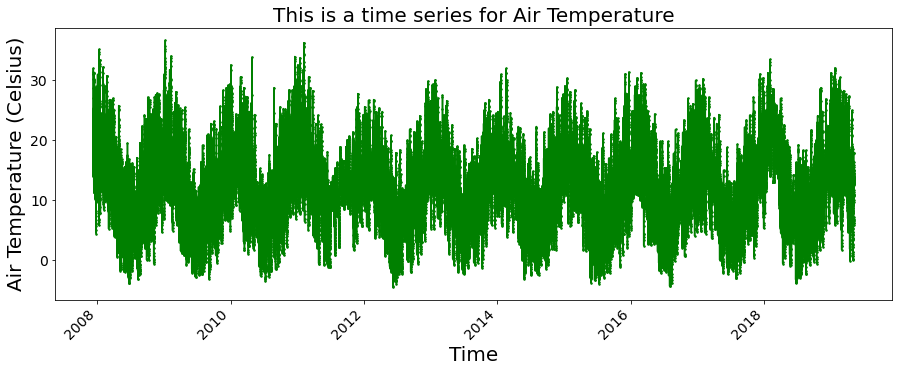

In [105]:
ds.temperature[0,0,100000:200000].plot(linestyle="-", color="green",figsize=(15,5),marker=".",markersize=3)
plt.xlabel("Time",fontsize=20)
plt.ylabel("Air Temperature (Celsius)",fontsize=20)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14,rotation=0)
plt.title("This is a time series for Air Temperature",fontsize=20)
plt.xlabel("Time")

#### Plotting using the "sel" function

"In Python, sel is a method that is used to select data from an xarray DataArray or Dataset object along a specified dimension or dimensions. The sel method takes a dictionary as its argument, where the keys are the dimension names and the values are the indices or slices to select."

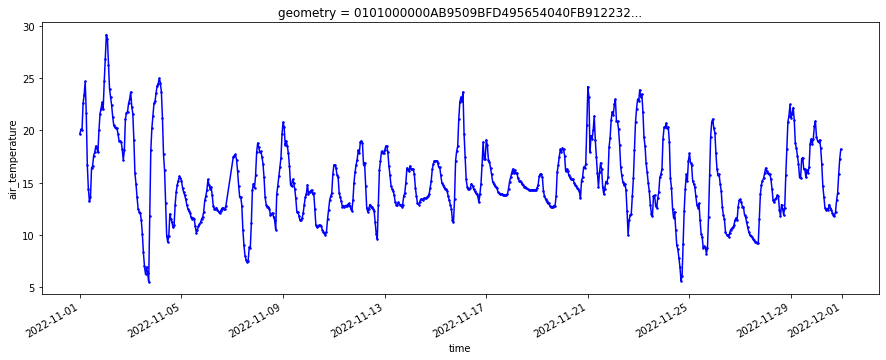

In [152]:
Tair=ds.temperature.sel(time=slice("2022-11-01","2022-11-30")) # time slice from January 01, 2023 to August 09, 2023
Tair.plot(linestyle="-", color="blue",figsize=(15,5),marker=".",markersize=3)

Task
1. Produce four time series plots of wind speed, wind direction, air temperature, and precipitation for the period between January 01, 2023 to August 09, 2023. Put the plots one after the other.

In [30]:
Tair=ds.temperature.sel(time=slice("2023-01-01", "2023-09-08"))
WS=ds.wind_speed.sel(time=slice("2023-01-01", "2023-09-08"))
WD=ds.wind_direction.sel(time=slice("2023-01-01", "2023-09-08"))
Precip=ds.precipitation.sel(time=slice("2023-01-01", "2023-09-08"))